## Homework:

Highly nonlinear oscillator: 

Recall the numerical solution for oscillations of a spring with power p = 12 (use F=-0.01\*y[0]\**11). Decompose the solution into a Fourier series and determine the number of higher harmonics that contribute at least 10%; for example, determine the n for which |bn /b1 | < 0.1. Check that resuming the components reproduces the signal.
(Landau 289)

Warning: please only sample the data within one period

Landau, Rubin H., Manuel Páez, Cristian Bordeianu. Computational Physics: Problem Solving with Python, 3rd Edition. Wiley-Blackwell, 2015-07-15. VitalBook file.

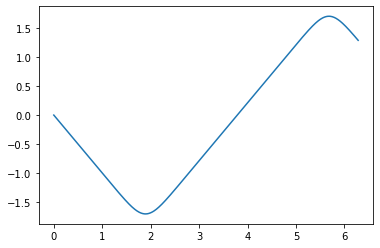

In [1]:
# Let's first try linear force  Fx=-x, then try Fx=, -x**3, -x**5, ..., -x**11

""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# rk4.py 4th order Runge Kutta
		 
import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 2*np.pi #6.2832
n = 1000                                        
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                      
    fReturn[1] = -0.01*y[0]**11
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)
p.show()

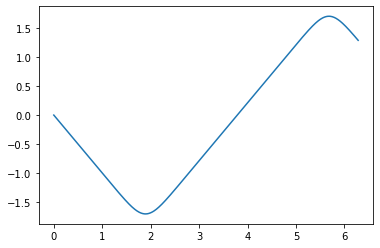

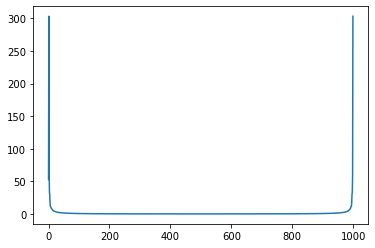

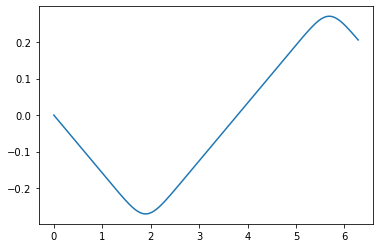

In [2]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
    
N = 1000;                  Np = N                           
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
nplot = zeros( N, float )   
fplot = zeros( N, float )
      
def fourier(dftz):                                # DFT
    for n in range(0, Np):              # the n frequency
        zsum = complex(0.0, 0.0)
        for  k in range(0, N):
            zexpo = complex(0, twopi*k*n/N)           # Complex exponent
            zsum += yp[k]*cmath.exp(-1*zexpo)#/sq2pi
        dftz[n] = zsum * sq2pi      
        nplot[n] = n
        fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

def invfourier(func):
#     func1=func
    N=len(func)
    inv=np.zeros(N, complex)
    for n in range(N):
        for  k in range(N):
            zexpo = complex(0, twopi*k*n/N)           # Complex exponent
            inv[n] += (func[k]*cmath.exp(zexpo)*sq2pi/N)
    return inv.real
        
        
fourier(dftz)              # Call signal, transform

plt.plot(xp,yp)
plt.show()
plt.plot(nplot,fplot)
plt.show()

x = np.linspace(0,twopi, N)
y = invfourier(dftz)      #calls the inverse transform

plt.plot(x,y)
plt.show()

In [3]:
fourier_coeff_max = (abs(max(dftz)))
print(f"Maximum Fourier coefficient: {fourier_coeff_max}")
print(dftz)

Maximum Fourier coefficient: 303.3131680327482
[-5.31324696e+01+0.00000000e+00j  1.40454472e+02+2.68833441e+02j
  3.24285124e+01+5.03728186e+01j -1.17854826e+01+3.17252932e+01j
 -5.40174926e+00+2.86996365e+01j -2.29987823e-01+1.65999909e+01j
 -1.90676001e+00+1.18015607e+01j -1.13774332e+00+1.15250998e+01j
  1.20810531e-01+1.00572518e+01j -6.13012957e-02+8.72971955e+00j
 -2.54683613e-01+8.16721438e+00j -1.63686282e-01+7.52464599e+00j
 -2.03165969e-01+6.82601142e+00j -2.70549361e-01+6.30561837e+00j
 -2.61994858e-01+5.86614217e+00j -2.53055447e-01+5.45584912e+00j
 -2.59272065e-01+5.10824047e+00j -2.57193517e-01+4.81106132e+00j
 -2.53395316e-01+4.54250821e+00j -2.54134671e-01+4.30204073e+00j
 -2.54821492e-01+4.08749734e+00j -2.54591422e-01+3.89261359e+00j
 -2.54907197e-01+3.71483669e+00j -2.55313204e-01+3.55279069e+00j
 -2.55411751e-01+3.40422785e+00j -2.55503759e-01+3.26740581e+00j
 -2.55640150e-01+3.14114429e+00j -2.55726428e-01+3.02425739e+00j
 -2.55796961e-01+2.91568367e+00j -2.5587920

In [4]:
gated_dftz=dftz.copy()
for n in range(len(gated_dftz)):
    if abs(gated_dftz[n]) < 0.1*fourier_coeff_max:
        gated_dftz[n]=0

print(gated_dftz)

[-53.13246961  +0.j         140.45447178+268.83344148j
  32.42851239 +50.37281863j -11.78548264 +31.72529322j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0.j
   0.          +0.j           0.          +0

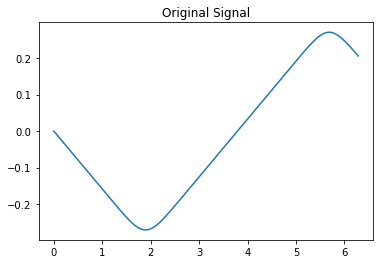

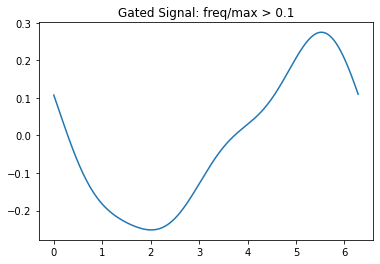

In [5]:
gated_y = invfourier(gated_dftz)

plt.plot(x,y)
plt.title("Original Signal")
plt.show()
plt.plot(x, gated_y)
plt.title("Gated Signal: freq/max > 0.1")
plt.show()

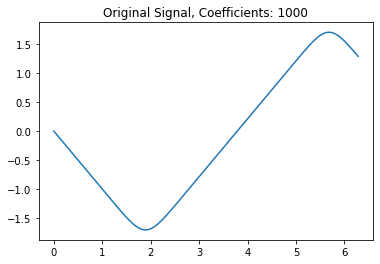

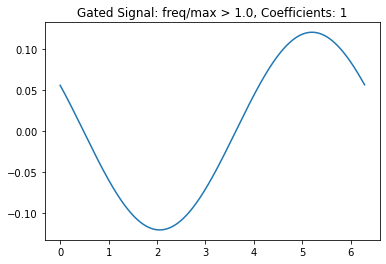

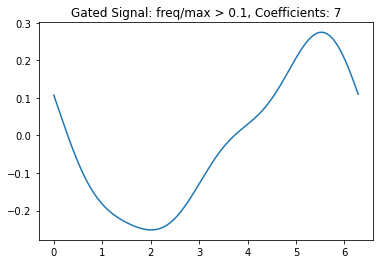

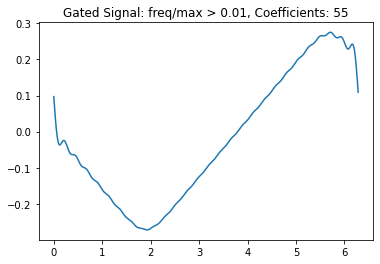

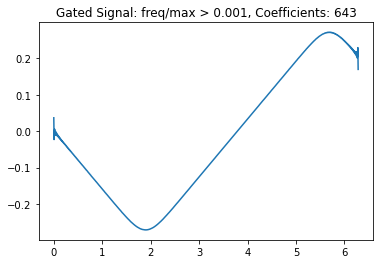

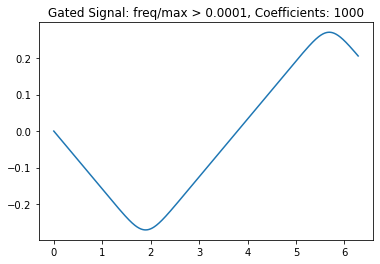

In [6]:
count =dftz[abs(dftz)>0.0]
plt.plot(xp,yp)
plt.title(f"Original Signal, Coefficients: {len(count)}")
plt.show()

for i in arange(0,5):
    gated_count=[]
    vari_gated_dftz=dftz.copy()
    vari_gated_dftz[abs(vari_gated_dftz)/fourier_coeff_max <= 1/10**i]=0
    gated_count =vari_gated_dftz[abs(vari_gated_dftz)>0.0]
    vari_gated_y = invfourier(vari_gated_dftz)
    plt.plot(x, vari_gated_y)
    plt.title(f"Gated Signal: freq/max > {1/(10**i)}, Coefficients: {len(gated_count)}")
    plt.show()
